# Montecarlo Packet Visualization

`RPacketPlotter` plots the `RPackets` that are generated by the [Montecarlo](https://tardis-sn.github.io/tardis/physics/montecarlo/index.html) method and creates an animated plot that contains the packet trajectories as they move away from the photosphere.
The properties of individual RPackets are taken from the [rpacket_tracker](https://tardis-sn.github.io/tardis/io/output/rpacket_tracking.html).

`RPacketPlotter` uses the properties (specifically, `mu` and `r`) present in the `rpacket_tracker` to calculate the coordinates of packets as they move through the ejecta. In the following section, the mathematical expression for getting the angle(θ) of packets with respect to the x-axis is shown, which can be used (along with radius `r`) to calculate the x and y coordinates of packets.

## Getting packet coordinates

`RPacketPlotter` uses the properties (specifically, `θ` and `r`) present in the `rpacket_tracker` to calculate the coordinates of packets as they move through the ejecta. In the following section, the mathematical expression for getting the angle(α) of packets with respect to the x-axis is shown, which can be used (along with radius `r`) to calculate the x and y coordinates of packets.
<br><br>
<img src="../images/packet_diagram.jpg" style="display: block; margin-left: auto; margin-right: auto; width:400px">

<br>The diagram above shows the packet trajectory as it starts from photosphere `P0` and continues to move along the subsequent points `P1`, `P2`, and so on.

<div class="alert alert-info">

Note
    
Here `θ` represents the direction of packet propagation with respect to the radial line.
    
</div>

To determine the polar coordinates of any arbitrary point, say `P2`, we need `r2` and `α2`. `r2` is already present in the array obtained from the simulation. To determine `α2`, we use the sine rule and apply it to the triangle `OP1P2`, where `O` is the center.

$$
\frac{r_2}{\sin(\pi - \theta_1)} = \frac{r_1}{\sin(\beta)}
$$

Now, writing `α` in terms of `μ1` and `θ2`

$$ 
\beta = \theta_1 - \alpha_2
$$
$$
\frac{r_2}{\sin(\pi - \theta_1)} = \frac{r_1}{\sin(\theta_1 - \alpha_2)}
$$

Thus,

$$ 
\alpha_2 = -\sin^{-1} \left( \frac{r_1}{r_2} \sin(\theta_1) \right) + \theta_1
$$

Hence, for `i-th` point, `θ` will be:

$$ 
\alpha_i = -\sin^{-1} \left( \frac{r_{i-1}}{r_i} \sin(\theta_{i-1}) \right) + \theta_{i-1}
$$

## Running the simulation

In [1]:
from tardis import run_tardis
from tardis.io.configuration.config_reader import Configuration
from tardis.io.atom_data import download_atom_data

# We download the atomic data needed to run the simulation
download_atom_data('kurucz_cd23_chianti_H_He_latest')

Atomic Data kurucz_cd23_chianti_H_He_latest already exists in /Users/atharva/Downloads/tardis-data/kurucz_cd23_chianti_H_He_latest.h5. Will not download - override with force_download=True.


In [12]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [3]:
# Reading the Configuration stored in tardisexamp≤.ymltardis_example.yml into config

config = Configuration.from_yaml("tardis_example.yml")

In [4]:
# changing config file for enabling the rpacket_tracking

config["montecarlo"]["tracking"]["track_rpacket"]=True

## Plotting Packets with RPacketPlotter

In [5]:
sim = run_tardis(config, show_progress_bars=False)

Auto-detected Jupyter notebook environment


Auto-detected Jupyter notebook environment


Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Initializing tabulator and plotly panel extensions for widgets to work


BokehModel(combine_events=True, render_bundle={'docs_json': {'a113fe0c-4e61-485c-9e10-20a15364bb6c': {'version…

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Embedding the final state for Jupyter environments


Importing the RPacketPlotter

In [6]:
from tardis.visualization import RPacketPlotter

Now, we create an RPacketPlotter object `rpacket_plotter` that will be used to generate a plot.

`no_of_packets` can be specified as a parameter to the `from_simulation` class method. By default, `15` packets will used to create a plot.

In [16]:
rpacket_plotter = RPacketPlotter.from_simulation(sim, no_of_packets=200)

Using the `rpacket_plotter` we use the `generate_plot` method to create a plot.

Here the `theme` parameter can be defined. Currently, we have 2 themes, i.e. `light` and `dark`. By Default the `light` theme will be plotted.

In [14]:
sim.transport.transport_state.rpacket_tracker_df.status.unique()

['IN_PROCESS', 'REABSORBED', 'EMITTED']
Categories (4, object): ['IN_PROCESS', 'EMITTED', 'REABSORBED', 'ADIABATIC_COOLING']

In [13]:
sim.transport.transport_state.rpacket_tracker_df.head(100)

r  shell_id interaction_type      status  \
packet_id event_id                                                        
0         0         1.235520e+15         0         BOUNDARY  IN_PROCESS   
          1         1.265887e+15         0             LINE  IN_PROCESS   
          2         1.247165e+15         0             LINE  IN_PROCESS   
          3         1.247232e+15         0             LINE  IN_PROCESS   
          4         1.250482e+15         0             LINE  IN_PROCESS   
          5         1.250482e+15        -1         BOUNDARY  IN_PROCESS   
          6         1.235520e+15         1         BOUNDARY  REABSORBED   
1         0         1.235520e+15         0         BOUNDARY  IN_PROCESS   
          1         1.235520e+15         1         BOUNDARY  IN_PROCESS   
          2         1.286064e+15         2         BOUNDARY  IN_PROCESS   
          3         1.336608e+15         3         BOUNDARY  IN_PROCESS   
          4         1.387152e+15         4         BOUNDARY  IN_PROCESS   
          5         1.437696e+15         5         BOUNDARY  IN_PROCESS   
          6         1.488240e+15         6         BOUNDARY  IN_PROCESS   
          7         1.538784e+15         7         BOUNDARY  IN_PROCESS   
          8         1.589328e+15         8         BOUNDARY  IN_PROCESS   
          9         1.639872e+15         9         BOUNDARY  IN_PROCESS   
          10        1.690416e+15        10         BOUNDARY  IN_PROCESS   
          11        1.740960e+15        11         BOUNDARY  IN_PROCESS   
          12        1.791504e+15        12         BOUNDARY  IN_PROCESS   
          13        1.842048e+15        13         BOUNDARY  IN_PROCESS   
          14        1.892592e+15        14         BOUNDARY  IN_PROCESS   
          15        1.943136e+15        15         BOUNDARY  IN_PROCESS   
          16        1.993680e+15        16         BOUNDARY  IN_PROCESS   
          17        2.044224e+15        17         BOUNDARY  IN_PROCESS   
          18        2.094768e+15        18         BOUNDARY  IN_PROCESS   
          19        2.145312e+15        19         BOUNDARY  IN_PROCESS   
          20        2.195856e+15        20         BOUNDARY  IN_PROCESS   
          21        2.246400e+15        20         BOUNDARY     EMITTED   
2         0         1.235520e+15         0         BOUNDARY  IN_PROCESS   
          1         1.280526e+15         0      ESCATTERING  IN_PROCESS   
          2         1.280526e+15         1         BOUNDARY  IN_PROCESS   
          3         1.313802e+15         1      ESCATTERING  IN_PROCESS   
          4         1.313802e+15         0         BOUNDARY  IN_PROCESS   
          5         1.286064e+15        -1         BOUNDARY  IN_PROCESS   
          6         1.235520e+15         1         BOUNDARY  REABSORBED   
3         0         1.235520e+15         0         BOUNDARY  IN_PROCESS   
          1         1.256558e+15         0      ESCATTERING  IN_PROCESS   
          2         1.256558e+15        -1         BOUNDARY  IN_PROCESS   
          3         1.235520e+15         1         BOUNDARY  REABSORBED   
4         0         1.235520e+15         0         BOUNDARY  IN_PROCESS   
          1         1.235520e+15         1         BOUNDARY  IN_PROCESS   
          2         1.286064e+15         2         BOUNDARY  IN_PROCESS   
          3         1.336608e+15         3         BOUNDARY  IN_PROCESS   
          4         1.387152e+15         4         BOUNDARY  IN_PROCESS   
          5         1.437696e+15         5         BOUNDARY  IN_PROCESS   
          6         1.488240e+15         6         BOUNDARY  IN_PROCESS   
          7         1.538784e+15         7         BOUNDARY  IN_PROCESS   
          8         1.589328e+15         8         BOUNDARY  IN_PROCESS   
          9         1.639872e+15         9         BOUNDARY  IN_PROCESS   
          10        1.690416e+15        10         BOUNDARY  IN_PROCESS   
          11        1.740960e+15        11         BOUND

In [22]:
sim.transport.transport_state.rpacket_tracker_df[sim.transport.transport_state.rpacket_tracker_df['interaction_type'] != 'BOUNDARY'].head(50)

r  shell_id interaction_type      status  \
packet_id event_id                                                        
0         1         1.265887e+15         0             LINE  IN_PROCESS   
          2         1.247165e+15         0             LINE  IN_PROCESS   
          3         1.247232e+15         0             LINE  IN_PROCESS   
          4         1.250482e+15         0             LINE  IN_PROCESS   
2         1         1.280526e+15         0      ESCATTERING  IN_PROCESS   
          3         1.313802e+15         1      ESCATTERING  IN_PROCESS   
3         1         1.256558e+15         0      ESCATTERING  IN_PROCESS   
5         1         1.239074e+15         0      ESCATTERING  IN_PROCESS   
9         2         1.330183e+15         1             LINE  IN_PROCESS   
10        6         1.514322e+15         5      ESCATTERING  IN_PROCESS   
          10        1.385949e+15         2             LINE  IN_PROCESS   
          18        1.708187e+15         9             LINE  IN_PROCESS   
          19        1.725576e+15         9             LINE  IN_PROCESS   
          21        1.751577e+15        10             LINE  IN_PROCESS   
          27        2.013038e+15        15             LINE  IN_PROCESS   
11        2         1.323024e+15         1      ESCATTERING  IN_PROCESS   
          6         1.441804e+15         4      ESCATTERING  IN_PROCESS   
12        1         1.250212e+15         0      ESCATTERING  IN_PROCESS   
          2         1.254393e+15         0             LINE  IN_PROCESS   
          3         1.247241e+15         0      ESCATTERING  IN_PROCESS   
13        1         1.264308e+15         0             LINE  IN_PROCESS   
15        1         1.268594e+15         0      ESCATTERING  IN_PROCESS   
          4         1.383931e+15         2             LINE  IN_PROCESS   
19        2         1.315665e+15         1             LINE  IN_PROCESS   
          4         1.347382e+15         2      ESCATTERING  IN_PROCESS   
21        2         1.314950e+15         1             LINE  IN_PROCESS   
          3         1.306841e+15         1             LINE  IN_PROCESS   
25        1         1.255240e+15         0      ESCATTERING  IN_PROCESS   
28        1         1.238627e+15         0      ESCATTERING  IN_PROCESS   
31        3         1.352477e+15         2             LINE  IN_PROCESS   
          4         1.352178e+15         2             LINE  IN_PROCESS   
32        1         1.248291e+15         0      ESCATTERING  IN_PROCESS   
          2         1.250517e+15         0      ESCATTERING  IN_PROCESS   
33        1         1.258597e+15         0             LINE  IN_PROCESS   
          2         1.258388e+15         0      ESCATTERING  IN_PROCESS   
          3         1.256954e+15         0             LINE  IN_PROCESS   
35        1         1.254716e+15         0      ESCATTERING  IN_PROCESS   
          2         1.243793e+15         0             LINE  IN_PROCESS   
36        2         1.289383e+15         1      ESCATTERING  IN_PROCESS   
          4         1.260689e+15         0             LINE  IN_PROCESS   
39        1         1.247796e+15         0             LINE  IN_PROCESS   
41        14        1.893911e+15        13      ESCATTERING  IN_PROCESS   
          19        2.000183e+15        15      ESCATTERING  IN_PROCESS   
          27        1.673692e+15         8      ESCATTERING  IN_PROCESS   
42        1         1.246825e+15         0             LINE  IN_PROCESS   
43        5         1.452656e+15         4      ESCATTERING  IN_PROCESS   
47        1         1.238983e+15         0             LINE  IN_PROCESS   
          2         1.240821e+15         0             LINE  IN_PROCESS   
48        3         1.337217e+15         2      ESCATTERING  IN_PROCESS   
          9         1.593231e+15         7      ESCATTERING  IN_PROCESS   

                    line_absorb_id  line_emit_id     before_nu  before_mu  \
packet_id event_id                                   

skipping, {packet_no}  1
skipping, {packet_no}  4
skipping, {packet_no}  6
skipping, {packet_no}  7
skipping, {packet_no}  8
skipping, {packet_no}  14
skipping, {packet_no}  16
skipping, {packet_no}  17
skipping, {packet_no}  18
skipping, {packet_no}  20
skipping, {packet_no}  22
skipping, {packet_no}  23
skipping, {packet_no}  24
skipping, {packet_no}  26
skipping, {packet_no}  27
skipping, {packet_no}  29
skipping, {packet_no}  30
skipping, {packet_no}  34
skipping, {packet_no}  37
skipping, {packet_no}  38
skipping, {packet_no}  40
skipping, {packet_no}  44
skipping, {packet_no}  45
skipping, {packet_no}  46
skipping, {packet_no}  51
skipping, {packet_no}  52
skipping, {packet_no}  61
skipping, {packet_no}  62
skipping, {packet_no}  64
skipping, {packet_no}  65
skipping, {packet_no}  67
skipping, {packet_no}  69
skipping, {packet_no}  74
skipping, {packet_no}  75
skipping, {packet_no}  76
skipping, {packet_no}  77
skipping, {packet_no}  79
skipping, {packet_no}  81
skipping, {packet

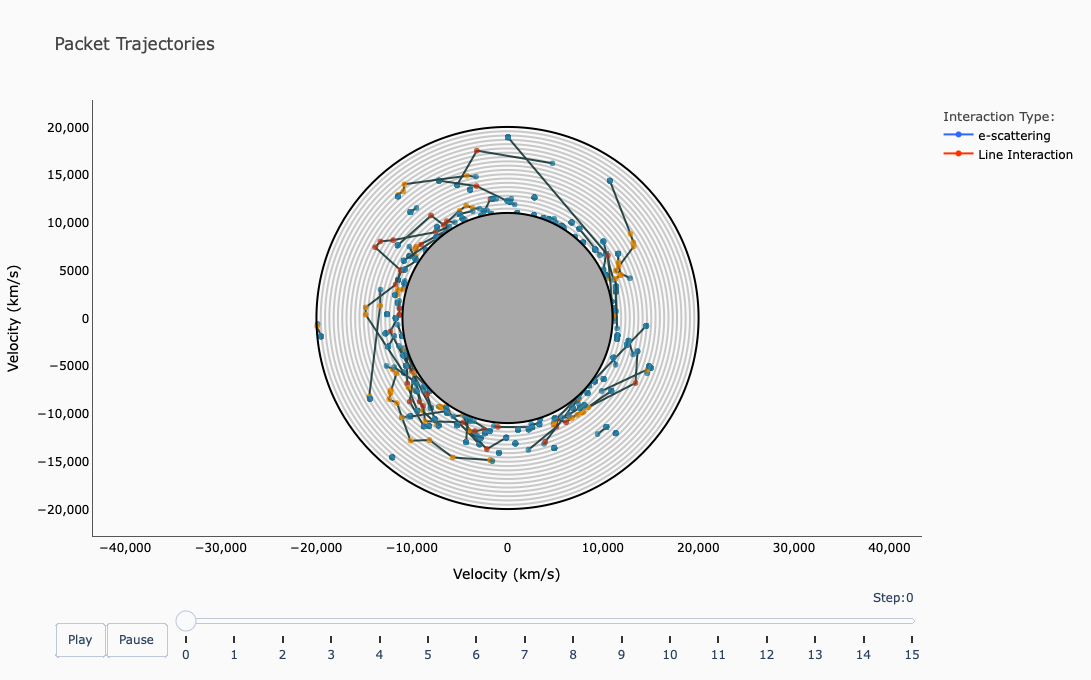

In [17]:
rpacket_plotter.generate_plot().show()

In [ ]:
sim.transport.transport_state.rpacket_tracker_df[sim.transport.transport_state.rpacket_tracker_df['interaction_type'] != 'BOUNDARY'].head(50)

In [12]:
rpacket_plotter.generate_plot(theme="dark").show(renderer="notebook_connected")

KeyError: 0

In [22]:
df = rpacket_plotter.sim.transport.transport_state.rpacket_tracker_df
print(f"DataFrame shape: {df.shape}")
print(f"Index levels: {df.index.names}")
print(f"First few index values: {df.index[:10]}")

# Check if packet_no access works
packet_0_data = df.loc[0]
print(f"Packet 0 data shape: {packet_0_data.shape}")
print(f"r values: {packet_0_data['r'][:5]}")
print(f"after_mu values: {packet_0_data['after_mu'][:5]}")

# Check coordinate calculation for one packet
x, y, interactions = rpacket_plotter.get_coordinates_multiple_packets(df.loc[0:0])
print(f"Generated coordinates - x shape: {x[0].shape}, y shape: {y[0].shape}")
print(f"x values: {x[0][:5]}, y values: {y[0][:5]}")


DataFrame shape: (2085491, 12)
Index levels: ['packet_id', 'event_id']
First few index values: MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3),
            (0, 4),
            (0, 5),
            (0, 6),
            (1, 0),
            (1, 1),
            (1, 2)],
           names=['packet_id', 'event_id'])
Packet 0 data shape: (7, 12)
r values: event_id
0    1.235520e+15
1    1.265887e+15
2    1.247165e+15
3    1.247232e+15
4    1.250482e+15
Name: r, dtype: float64
after_mu values: event_id
0         NaN
1   -0.608549
2    0.052209
3    0.025872
4   -0.281524
Name: after_mu, dtype: float64


KeyError: 1

In [24]:
print(f"Available packet IDs: {df.index.get_level_values(0).unique()[:10]}")
print(f"no_of_packets setting: {rpacket_plotter.no_of_packets}")

Available packet IDs: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='packet_id')
no_of_packets setting: 100


In [28]:
# Corrected validation:
# Check data access
packet_0 = df.loc[0]
print(f"Packet 0 shape: {packet_0.shape}")
print(f"Columns: {list(packet_0.columns)}")

# Check coordinate calculation  
x, y, interactions = rpacket_plotter.get_coordinates_with_theta_init(
  packet_0['r'], packet_0['after_mu'],
  rpacket_plotter.sim.simulation_state.time_explosion.value,
  packet_0['interaction_type']
)
print(f"Generated coords: x len={len(x)}, y len={len(y)}")
print(f"Sample coords: x[0]={x[0]}, y[0]={y[0]}")

Packet 0 shape: (7, 12)
Columns: ['r', 'shell_id', 'interaction_type', 'status', 'line_absorb_id', 'line_emit_id', 'before_nu', 'before_mu', 'before_energy', 'after_nu', 'after_mu', 'after_energy']
Generated coords: x len=7, y len=7
Sample coords: x[0]=11000.000000000002, y[0]=0.0


In [29]:
for item in zip(x,y):
    print(item)

(np.float64(11000.000000000002), np.float64(0.0))
(np.float64(nan), np.float64(nan))
(np.float64(nan), np.float64(nan))
(np.float64(nan), np.float64(nan))
(np.float64(nan), np.float64(nan))
(np.float64(nan), np.float64(nan))
(np.float64(nan), np.float64(nan))


## Using Animation and Other interactive features

The `Play` button at the bottom-left can be used to start the animation. The animation can be paused at any time using the `pause` button. Also, the `timeline slider` can be used to reach any point in the animation. A demo is shown below.
<br><br>
<img src="attachment:ezgif.com-gif-maker.gif" style="width:800px">
<br><br>

Hovering over any packet will show its properties like its coordinates, interaction type, etc. The `zoom-in` feature can be used to view a particular part of the plot. The demo below shows these features.
<br><br>
<img src="attachment:ezgif.com-gif-maker%20%281%29.gif" style="width:800px">